THE SYRIATEL CUSTOMER CHURN 
project by Phoebe Wawire 
CLASS OF DSF-PT7

A.THE PROBLEM STATEMENT

I want to predict whether a customer with the company named SyriaTel churn will stop doing business with them based on various factors.
 My Audience is the telecom business who are interested to know how much money they will loose when customers donot stick around for long. 
 My target variable will be categorical with two classes, labeled as 1 for churn and 0 for no churn.

B. DATA COLLECTION

1. Imported all the necessary libraries

In [1352]:
import pandas as pd
import numpy as np  
import seaborn as sns
from hashlib import sha256
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imPipeline
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder


2. Loading the dataset

In [1353]:
# Load the dataset
df = pd.read_csv("C:\\Users\\User\\OneDrive\\Desktop\\phase_3_project\\Syriatel-telcom-phase-3-project\\bigml_59c28831336c6604c800002a.csv")

C. EXPLORING THE DATA ANALYSIS(EDA)

1. View the dataset dimesions

In [1354]:
#view dimensions of dataset
df.shape

(3333, 21)

It shows there are 3333 instances and 21 variables in the data set.

2. Preview the dataset
 I preview to see the firts few columns and rows of the dataset

In [1355]:
#preview the dataset
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Summary of the 21 columns of the dataset
1 Boolean column
8 Floating Point columns
8 Integer columns
4 Object (String) columns

Churn is the target variable.

3. Check names of the columns

In [1356]:
col_names = df.columns
col_names

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

4. Viewing the summary of the datasets

In [1357]:
#view summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

Types of variables
I will sort the dataset into data types. There are a mixture of categorical, numerical, intergers and boolean variables in the dataset. Categorical variables have data type object, 
Numerical variables have data type float64,
Boolean variables have data type bool and
Intergers have data type int64


5. Finding the categorical variables

In [1358]:
#find categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)

There are 4 categorical variables

The categorical variables are : ['state', 'phone number', 'international plan', 'voice mail plan']


5. i. Viewing the categorical variables

In [1359]:
#view the categorical variables
df[categorical].head()

,state,phone number,international plan,voice mail plan
0,KS,382-4657,no,yes
1,OH,371-7191,no,yes
2,NJ,358-1921,no,no
3,OH,375-9999,yes,no
4,OK,330-6626,yes,no


Summary of categorical variables

There are 4 categorical variables. These are; state, phone number, international plan and voice mail plan

There are 2 binary categorical variables - International plan and Voice mail plan.


We will explore problems within categorical variables

5. ii. Missing values in categorical variables

In [1360]:
# check missing values in categorical variables
df[categorical].isnull().sum()

state                 0
phone number          0
international plan    0
voice mail plan       0
dtype: int64

There are no missing values in categorical variables

5. iii. Viewing the frequencies of categorical variables

In [1361]:
# view frequency of categorical variables
for var in categorical: 
    
    print(df[var].value_counts())

WV    106
MN     84
NY     83
AL     80
OH     78
OR     78
WI     78
WY     77
VA     77
CT     74
MI     73
VT     73
ID     73
TX     72
UT     72
IN     71
KS     70
MD     70
NJ     68
MT     68
NC     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
MO     63
FL     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64
391-8626    1
390-5470    1
333-1012    1
412-1991    1
364-8981    1
           ..
363-3295    1
411-8956    1
379-3132    1
398-1759    1
367-4853    1
Name: phone number, Length: 3333, dtype: int64
no     3010
yes     323
Name: international plan, dtype: int64
no     2411
yes     922
Name: voice mail plan, dtype: int64


5. iv. Viewing the frequencies distribution of the categorical variables

In [1362]:
# view frequency distribution of categorical variables
for var in categorical: 
    
    print(df[var].value_counts()/np.float64(len(df)))

WV    0.031803
MN    0.025203
NY    0.024902
AL    0.024002
OH    0.023402
OR    0.023402
WI    0.023402
WY    0.023102
VA    0.023102
CT    0.022202
MI    0.021902
VT    0.021902
ID    0.021902
TX    0.021602
UT    0.021602
IN    0.021302
KS    0.021002
MD    0.021002
NJ    0.020402
MT    0.020402
NC    0.020402
CO    0.019802
NV    0.019802
WA    0.019802
RI    0.019502
MA    0.019502
MS    0.019502
AZ    0.019202
MO    0.018902
FL    0.018902
NM    0.018602
ME    0.018602
ND    0.018602
NE    0.018302
OK    0.018302
DE    0.018302
SD    0.018002
SC    0.018002
KY    0.017702
IL    0.017402
NH    0.016802
AR    0.016502
GA    0.016202
DC    0.016202
HI    0.015902
TN    0.015902
AK    0.015602
LA    0.015302
PA    0.013501
IA    0.013201
CA    0.010201
Name: state, dtype: float64
391-8626    0.0003
390-5470    0.0003
333-1012    0.0003
412-1991    0.0003
364-8981    0.0003
             ...  
363-3295    0.0003
411-8956    0.0003
379-3132    0.0003
398-1759    0.0003
367-4853    0.000

Number of labels: cardinality
The number of labels within a categorical variable is known as cardinality. A high number of labels within a variable is known as high cardinality. High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

5. v. Checking for cardinality in the categorical variables

In [1363]:
# check for cardinality in categorical variables
for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

state  contains  51  labels
phone number  contains  3333  labels
international plan  contains  2  labels
voice mail plan  contains  2  labels


With this result state  contains  51  labels
phone number  contains  3333  labels
international plan  contains  2  labels
voice mail plan  contains  2  labels
We can see that there is a phone number variable which needs to be preprocessed due to it's higher cardinality
All the other variables contain relatively smaller number of labels.

Exploring categorical variables one by one; we start with State

1. State

In [1364]:
# Check the data type of the 'state' column
print("Data type of 'state' column before conversion:")
print(df['state'].dtype)

Data type of 'state' column before conversion:
object


In [1365]:
# Convert 'state' column to numeric codes using factorize
df['state'], unique = pd.factorize(df['state'])

# Print the DataFrame with the converted column
print("\nDataFrame with 'state' converted to numeric:")
print(df)

# Print the unique values mapping
print("\nUnique values mapping:")
print(dict(zip(unique, range(len(unique)))))

# Check the data type of the 'state' column after conversion
print("Data type of 'state' column after conversion:")
print(df['state'].dtype)


DataFrame with 'state' converted to numeric:
      state  account length  area code phone number international plan  \
0         0             128        415     382-4657                 no   
1         1             107        415     371-7191                 no   
2         2             137        415     358-1921                 no   
3         1              84        408     375-9999                yes   
4         3              75        415     330-6626                yes   
...     ...             ...        ...          ...                ...   
3328     20             192        415     414-4276                 no   
3329      8              68        415     370-3271                 no   
3330     10              28        510     328-8230                 no   
3331     49             184        510     364-6381                yes   
3332     47              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \

In [1366]:
# print number of labels in State variable
print('state contains', len(df["state"].unique()), 'labels')
# check labels in state variable
df.state.unique()

state contains 51 labels


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype=int64)

In [1367]:
# check frequency distribution of values in state variable
df["state"].value_counts()

8     106
37     84
13     83
4      80
31     78
32     78
1      78
16     77
23     77
49     74
14     73
33     73
15     73
17     72
35     72
9      71
0      70
29     70
2      68
12     68
39     68
42     66
40     66
19     66
46     65
5      65
10     65
20     64
6      63
18     63
50     62
45     62
41     62
3      61
34     61
22     61
38     60
21     60
44     59
25     58
26     56
30     55
43     54
27     54
24     53
47     53
28     52
7      51
48     45
11     44
36     34
Name: state, dtype: int64

2. Phone number

In [1368]:
# Sample DataFrame creation 
data = {'phone number': ['(123) 456-7890', '987-654-3210', '5551234567']}
df = pd.DataFrame(data)

# Check the data type of the 'phone number' column
print("Data type of 'phone number' column before conversion:")
print(df['phone number'].dtype)

Data type of 'phone number' column before conversion:
object


In [1369]:
# Clean the 'phone number' column by removing non-numeric characters
df['phone number'] = df['phone number'].str.replace(r'\D+', '', regex=True)

# Convert the 'phone number' column to numeric (as integers, for instance)
df['phone number'] = pd.to_numeric(df['phone number'], errors='coerce')

# Check the data type of the 'phone number' column after conversion
print("Data type of 'phone number' column after conversion:")
print(df['phone number'].dtype)

# Output the modified DataFrame
print(df)

Data type of 'phone number' column after conversion:
int64
   phone number
0    1234567890
1    9876543210
2    5551234567


In [1370]:
# print number of labels in phone number variable
print('phone number contains', len(df['phone number'].unique()), 'labels')
# check labels in phone number variable
df['phone number'].unique()

phone number contains 3 labels


array([1234567890, 9876543210, 5551234567], dtype=int64)

In [1371]:
# check frequency distribution of values in phone number variable
df['phone number'].value_counts()

9876543210    1
1234567890    1
5551234567    1
Name: phone number, dtype: int64

3. International Plan

In [1372]:
# Sample DataFrame creation
data = {
    'international plan': ['no', 'yes', 'no']  
}

df = pd.DataFrame(data)

# Check the data type of the 'international plan' column
print("Data type of 'international plan' column before conversion:")
print(df['international plan'].dtype)

Data type of 'international plan' column before conversion:
object


In [1373]:
# Convert 'international plan' column to numeric codes using factorize
df['international plan'], unique = pd.factorize(df['international plan'])

# Print the DataFrame with the converted column
print("\nDataFrame with 'international plan' converted to numeric:")
print(df)

# Print the unique values mapping
print("\nUnique values mapping:")
print(dict(zip(unique, range(len(unique)))))

# Check the data type of the 'international' column after conversion
print("Data type of 'international plan' column after conversion:")
print(df['international plan'].dtype)

# Output the modified DataFrame
print(df)


DataFrame with 'international plan' converted to numeric:
   international plan
0                   0
1                   1
2                   0

Unique values mapping:
{'no': 0, 'yes': 1}
Data type of 'international plan' column after conversion:
int64
   international plan
0                   0
1                   1
2                   0


In [1374]:
# print number of labels in international plan variable
print('international plan contains', len(df['international plan'].unique()), 'labels')
# check labels in international variable
df['international plan'].unique()

international plan contains 2 labels


array([0, 1], dtype=int64)

In [1375]:
# check frequency distribution of values in international variable
df['international plan'].value_counts()

0    2
1    1
Name: international plan, dtype: int64

4. Voice mail plan

In [1376]:
# Sample DataFrame creation
data = {
    'voice mail plan': ['no', 'yes', 'no']  
}

df = pd.DataFrame(data)

# Check the data type of the 'voice mail plan' column before conversion
print("Data type of 'voice mail plan' column before conversion:")
print(df['voice mail plan'].dtype)

Data type of 'voice mail plan' column before conversion:
object


In [1377]:
# Convert 'voice mail plan' column to numeric codes using factorize
df['voice mail plan'], unique = pd.factorize(df['voice mail plan'])

# Print the DataFrame with the converted column
print("\nDataFrame with 'voice mail plan' converted to numeric:")
print(df)

# Print the unique values mapping
print("\nUnique values mapping:")
print(dict(zip(unique, range(len(unique)))))

# Check the data type of the 'voice mail plan' column after conversion
print("Data type of 'voice mail plan' column after conversion:")
print(df['voice mail plan'].dtype)


DataFrame with 'voice mail plan' converted to numeric:
   voice mail plan
0                0
1                1
2                0

Unique values mapping:
{'no': 0, 'yes': 1}
Data type of 'voice mail plan' column after conversion:
int64


In [1378]:
# check frequency distribution of values in voice mail plan variable
df['voice mail plan'].value_counts()

0    2
1    1
Name: voice mail plan, dtype: int64

In [1379]:
# Sample DataFrame creation
data = {
    
    'voice mail plan': ['no', 'yes', 'no']
}

df = pd.DataFrame(data)

# Function to convert categorical columns to numeric
def convert_categorical_to_numeric(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            # Convert categorical data to numeric
            df[column], unique = pd.factorize(df[column])
            print(f"Converted '{column}' to numeric. Unique values mapping:")
            print(dict(zip(unique, range(len(unique)))))
    return df

# Print initial DataFrame and data types
print("Initial DataFrame:")
print(df)
print("\nInitial DataFrame data types:")
print(df.dtypes)

# Convert categorical columns to numeric
df = convert_categorical_to_numeric(df)

# Print the DataFrame with converted columns and data types
print("\nDataFrame after converting categorical columns to numeric:")
print(df)
print("\nDataFrame data types after conversion:")
print(df.dtypes)

Initial DataFrame:
  voice mail plan
0              no
1             yes
2              no

Initial DataFrame data types:
voice mail plan    object
dtype: object
Converted 'voice mail plan' to numeric. Unique values mapping:
{'no': 0, 'yes': 1}

DataFrame after converting categorical columns to numeric:
   voice mail plan
0                0
1                1
2                0

DataFrame data types after conversion:
voice mail plan    int64
dtype: object


Checking outliers in numerical variables

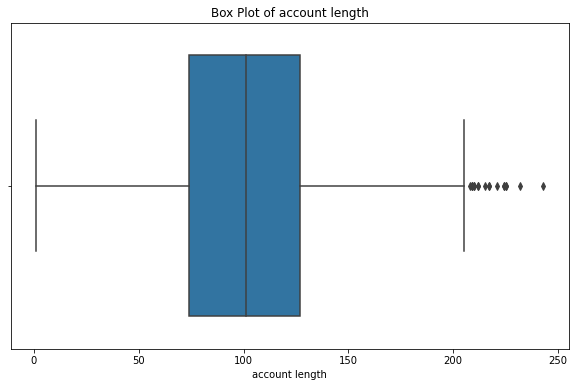

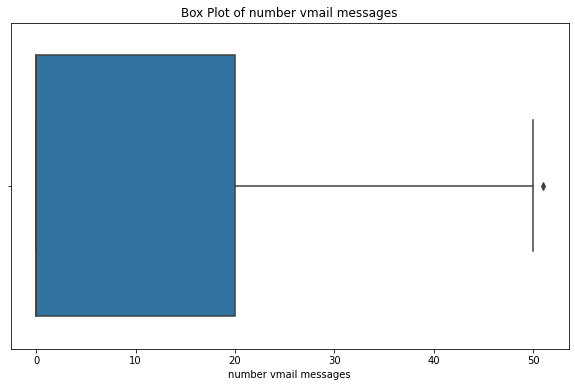

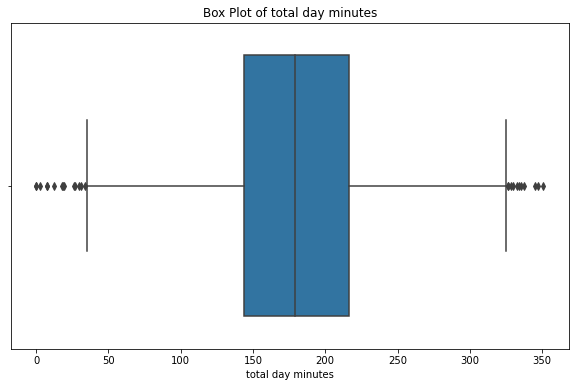

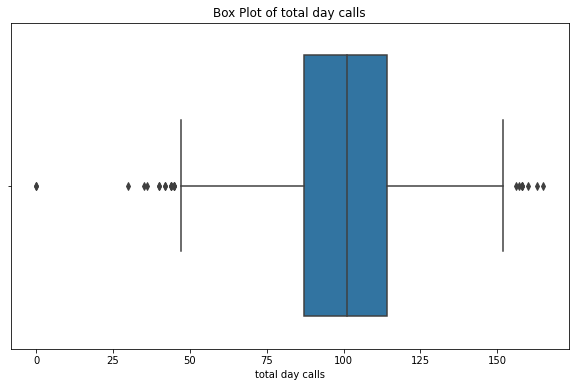

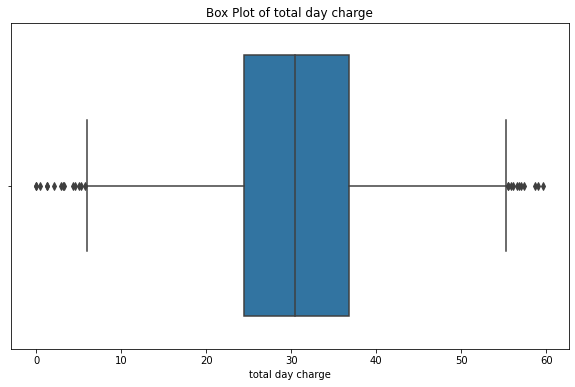

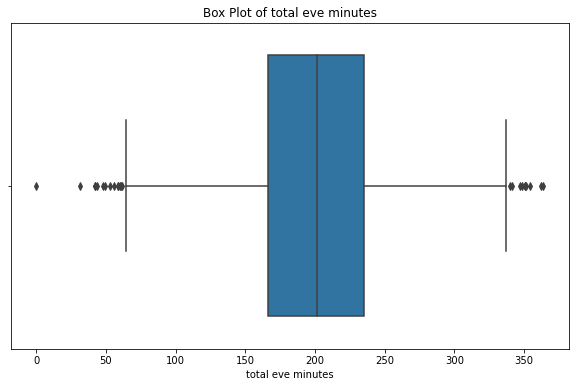

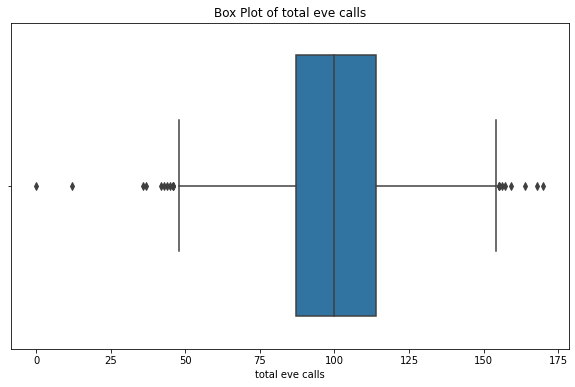

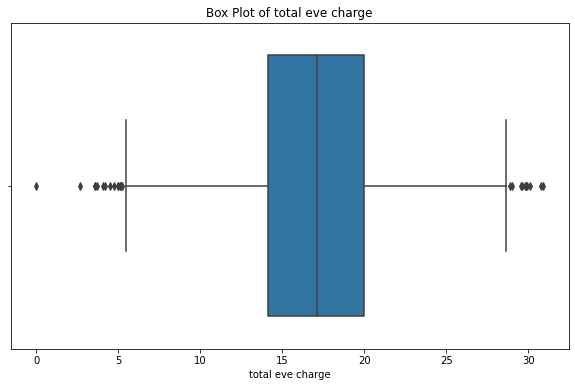

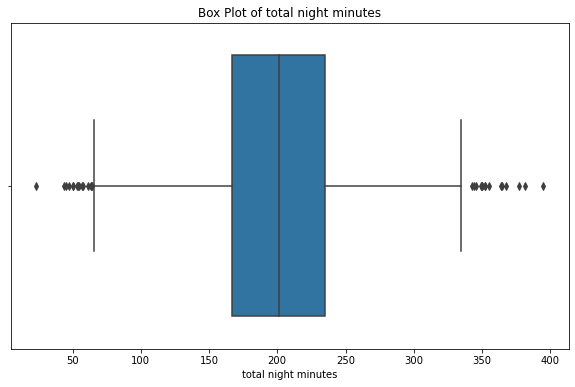

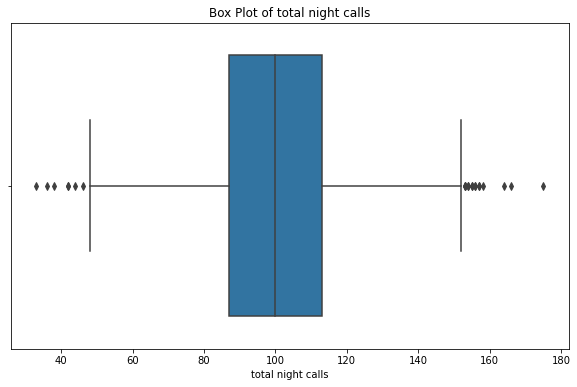

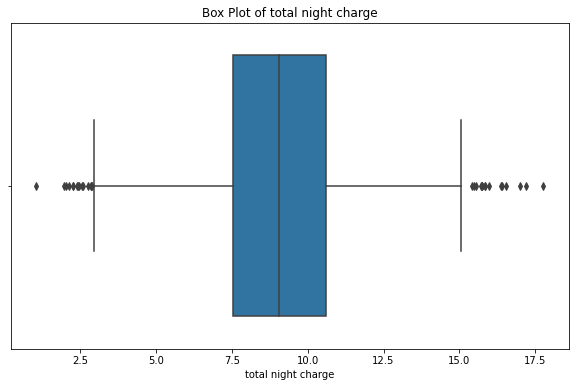

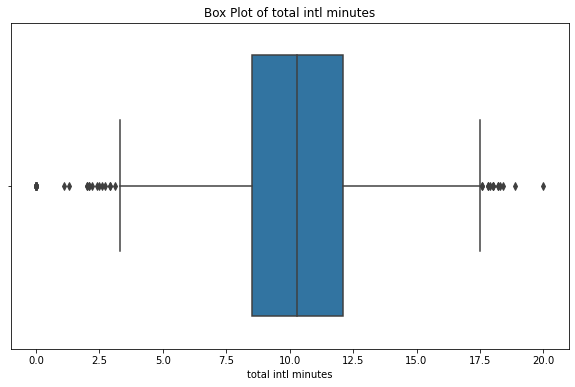

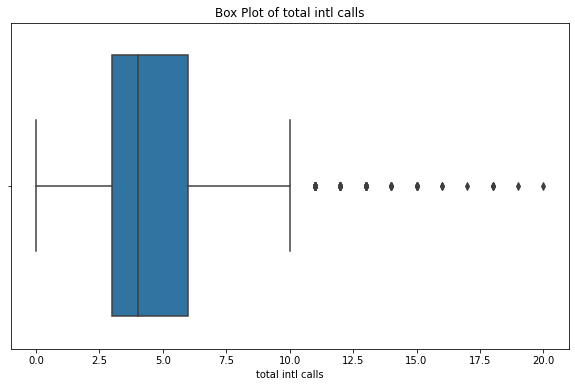

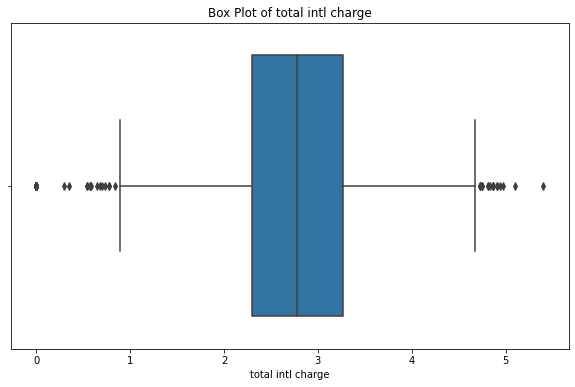

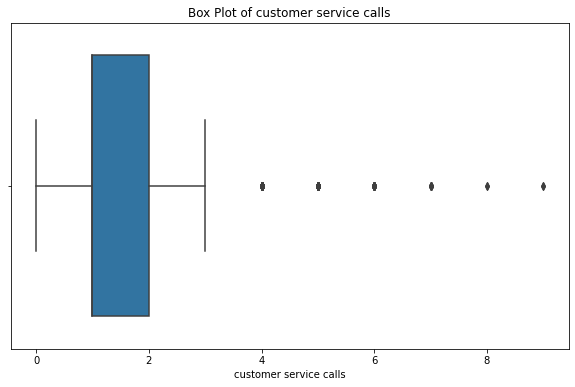

In [1380]:
# Load the dataset
df = pd.read_csv("C:\\Users\\User\\OneDrive\\Desktop\\phase_3_project\\Syriatel-telcom-phase-3-project\\bigml_59c28831336c6604c800002a.csv")

# List of numerical columns for which to create box plots
numerical_columns = [
    'account length', 'number vmail messages', 'total day minutes', 
    'total day calls', 'total day charge', 'total eve minutes', 
    'total eve calls', 'total eve charge', 'total night minutes', 
    'total night calls', 'total night charge', 'total intl minutes', 
    'total intl calls', 'total intl charge', 'customer service calls'
]

# Plot box plots for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

In [1381]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Check each numerical column for outliers
for column in numerical_columns:
    outliers = detect_outliers_iqr(df, column)
    if not outliers.empty:
        print(f"Outliers detected in column '{column}':")
        print(outliers[[column]].head())  # Print a few outlier values
    else:
        print(f"No outliers detected in column '{column}'.")

Outliers detected in column 'account length':
     account length
197             208
238             215
309             209
416             224
817             243
Outliers detected in column 'number vmail messages':
     number vmail messages
845                     51
Outliers detected in column 'total day minutes':
     total day minutes
15               332.9
156              337.4
197              326.5
365              350.8
605              335.5
Outliers detected in column 'total day calls':
      total day calls
315               158
468               163
692                36
740                40
1057              158
Outliers detected in column 'total day charge':
     total day charge
15              56.59
156             57.36
197             55.51
365             59.64
605             57.04
Outliers detected in column 'total eve minutes':
     total eve minutes
3                 61.9
6                348.5
8                351.6
32                31.2
302              

In [1382]:
import pandas as pd
import numpy as np
data = {
    'account length': [100, 200, 300, 400, 500, 600, 10000],  # 10000 is an outlier
    'number vmail messages': [1, 2, 3, 4, 5, 6, 100],  # 100 is an outlier
    'total day minutes': [10.5, 20.7, 30.1, 40.0, 50.2, 60.3, 1000.0],  # 1000.0 is an outlier
    'total day calls': [100, 200, 300, 400, 500, 600, 1000],  # 1000 is an outlier
    'total day charge': [1.5, 2.7, 3.1, 4.0, 5.2, 6.3, 200.0],  # 200.0 is an outlier
    'total eve minutes': [5.5, 15.7, 25.1, 35.0, 45.2, 55.3, 200.0],  # 200.0 is an outlier
    'total eve calls': [50, 150, 250, 350, 450, 550, 1000],  # 1000 is an outlier
    'total eve charge': [0.5, 1.7, 2.1, 3.0, 4.2, 5.3, 20.0],  # 20.0 is an outlier
    'total night minutes': [2.5, 12.7, 22.1, 32.0, 42.2, 52.3, 150.0],  # 150.0 is an outlier
    'total night calls': [20, 120, 220, 320, 420, 520, 1000],  # 1000 is an outlier
    'total night charge': [0.2, 1.7, 2.1, 3.0, 4.2, 5.3, 10.0]  # 10.0 is an outlier
}
df = pd.DataFrame(data)

# Identify numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Define a function to handle outliers by imputing with mean
def impute_outliers_with_mean(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mean_value = df[column].mean()
    # Impute outliers with mean
    df.loc[df[column] < lower_bound, column] = mean_value
    df.loc[df[column] > upper_bound, column] = mean_value

# Apply the function to all numerical columns
for column in numerical_columns:
    impute_outliers_with_mean(df, column)

# Display the DataFrame after handling outliers
print("DataFrame after imputing outliers with mean:")
print(df)

DataFrame after imputing outliers with mean:
   account length  number vmail messages  total day minutes  total day calls  \
0      100.000000               1.000000          10.500000            100.0   
1      200.000000               2.000000          20.700000            200.0   
2      300.000000               3.000000          30.100000            300.0   
3      400.000000               4.000000          40.000000            400.0   
4      500.000000               5.000000          50.200000            500.0   
5      600.000000               6.000000          60.300000            600.0   
6     1728.571429              17.285714         173.114286           1000.0   

   total day charge  total eve minutes  total eve calls  total eve charge  \
0          1.500000           5.500000             50.0          0.500000   
1          2.700000          15.700000            150.0          1.700000   
2          3.100000          25.100000            250.0          2.100000   
3     

In [1383]:
# Reload the dataset
df = pd.read_csv("C:\\Users\\User\\OneDrive\\Desktop\\phase_3_project\\Syriatel-telcom-phase-3-project\\bigml_59c28831336c6604c800002a.csv")

# Check the columns
print("Columns in DataFrame:", df.columns)

Columns in DataFrame: Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')


 Declare feature vector and target variable

In [1384]:
X = df.drop(['churn'], axis=1)

y = df['churn']

Split data into separate training and test set

In [1385]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [1386]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((2666, 20), (667, 20))

Feature Engineering
Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

First, I will display the categorical and numerical variables again separately.

In [1387]:
# Function to check missing values
def check_missing_values(df, dataset_name):
    print(f"Missing values in {dataset_name}:")
    missing_counts = df.isnull().sum()
    missing_counts = missing_counts[missing_counts > 0]
    if missing_counts.empty:
        print("No missing values.")
    else:
        print(missing_counts)
    print()

# Check missing values in training and testing sets
check_missing_values(X_train, 'X_train')
check_missing_values(X_test, 'X_test')

# Identify categorical and numerical columns
categorical_columns = X_train.select_dtypes(include=['object', 'bool']).columns
numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns

# Function to summarize missing values for categorical and numerical data separately
def summarize_missing_values(df, categorical_cols, numerical_cols, dataset_name):
    print(f"Missing values in {dataset_name}:")
    
    # Categorical columns
    cat_missing = df[categorical_cols].isnull().sum()
    cat_missing = cat_missing[cat_missing > 0]
    
    # Numerical columns
    num_missing = df[numerical_cols].isnull().sum()
    num_missing = num_missing[num_missing > 0]
    
    if not cat_missing.empty:
        print("Categorical Columns with Missing Values:")
        print(cat_missing)
    else:
        print("No missing values in categorical columns.")
    
    if not num_missing.empty:
        print("Numerical Columns with Missing Values:")
        print(num_missing)
    else:
        print("No missing values in numerical columns.")
    
    print()

# Summarize missing values for categorical and numerical data in both training and testing sets
summarize_missing_values(X_train, categorical_columns, numerical_columns, 'X_train')
summarize_missing_values(X_test, categorical_columns, numerical_columns, 'X_test')

Missing values in X_train:
No missing values.

Missing values in X_test:
No missing values.

Missing values in X_train:
No missing values in categorical columns.
No missing values in numerical columns.

Missing values in X_test:
No missing values in categorical columns.
No missing values in numerical columns.



We donot have missing values in all the columns

In [1388]:
#Convert Boolean to Integer
df['churn'] = df['churn'].astype(int)

In [1389]:
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns

In [1390]:
# Check for non-numeric values in categorical columns
categorical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in categorical_columns:
    print(f"Column: {col}")
    print(df[~df[col].apply(pd.to_numeric, errors='coerce').notna()][col])

Column: account length
Series([], Name: account length, dtype: int64)
Column: area code
Series([], Name: area code, dtype: int64)
Column: number vmail messages
Series([], Name: number vmail messages, dtype: int64)
Column: total day minutes
Series([], Name: total day minutes, dtype: float64)
Column: total day calls
Series([], Name: total day calls, dtype: int64)
Column: total day charge
Series([], Name: total day charge, dtype: float64)
Column: total eve minutes
Series([], Name: total eve minutes, dtype: float64)
Column: total eve calls
Series([], Name: total eve calls, dtype: int64)
Column: total eve charge
Series([], Name: total eve charge, dtype: float64)
Column: total night minutes
Series([], Name: total night minutes, dtype: float64)
Column: total night calls
Series([], Name: total night calls, dtype: int64)
Column: total night charge
Series([], Name: total night charge, dtype: float64)
Column: total intl minutes
Series([], Name: total intl minutes, dtype: float64)
Column: total in

In [1391]:
print(df.isnull().sum())

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


In [1392]:
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        print(f"Unique values in '{col}': {df[col].unique()}")

Unique values in 'account length': [128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 171  28 153 169  13  27   3  42 189 156 134 243  23   1 205
 200   5   9 178 181 182 217 177 210  29 180   2  17   7 212 232 192 195
 197 225 184 191 201  15 183 202   8 175   4 188 204 221]
Unique values in 'area code': [415 408 510]
Unique values in 'number vmail messages': [25 26  0 24 37 27

In [1393]:
# List of categorical columns
categorical_columns = ['state', 'phone number', 'international plan', 'voice mail plan']
boolean_columns = ['churn']

# Convert categorical columns using Label Encoding
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Convert to string if necessary
    label_encoders[col] = le

# Convert boolean columns
df[boolean_columns] = df[boolean_columns].astype(int)

# Verify the data types after conversion
print(df.dtypes)

state                       int32
account length              int64
area code                   int64
phone number                int32
international plan          int32
voice mail plan             int32
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int32
dtype: object


In [1394]:
# Identify categorical and numerical columns
categorical_columns = ['state', 'phone number', 'international plan', 'voice mail plan']
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns

# Create a Column Transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),  # Handle missing values for numerical data
            ('scaler', StandardScaler())  # Scale numerical features
        ]), numerical_columns),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values for categorical data
            ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Convert categorical features to one-hot encoded
        ]), categorical_columns)
    ]
)

# Create the full pipeline with preprocessing and model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear', random_state=0))
])

In [1395]:
# Fit the model
model.fit(X_train, y_train)

# Check training accuracy
print(f"Training Accuracy: {model.score(X_train, y_train):.4f}")

# Check testing accuracy
print(f"Testing Accuracy: {model.score(X_test, y_test):.4f}")

Training Accuracy: 0.9025
Testing Accuracy: 0.8486


Feature Scaling
we should map all the feature variables onto the same scale. 

In [1396]:
X_train.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.351463,437.351838,7.998500,179.960315,100.424231,30.593792,201.581808,100.087022,17.134659,201.218492,100.057389,9.054906,10.240548,4.477494,2.765439,1.554389
std,39.902158,42.488511,13.572182,54.233805,20.116856,9.219742,51.032044,20.031025,4.337756,50.615479,19.814583,2.277747,2.813472,2.439908,0.759618,1.317883
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,144.650000,87.000000,24.590000,166.925000,87.000000,14.192500,167.100000,86.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.400000,100.000000,30.500000,202.450000,100.000000,17.205000,201.200000,100.000000,9.055000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,19.000000,216.000000,114.000000,36.720000,236.200000,114.000000,20.080000,235.675000,114.000000,10.607500,12.100000,6.000000,3.270000,2.000000
max,232.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [1397]:
# Drop columns with object data types and the target column
df_numeric = df.drop(columns=['state', 'phone number', 'international plan', 'voice mail plan'])

# Drop the 'churn' column from the features and store it separately as the target
X = df_numeric.drop(columns=['churn'])
y = df_numeric['churn']

# Optionally, you can encode 'churn' if it's not already in numeric format
# y = y.astype(int)  # Uncomment if 'churn' is not already numeric

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

1. MODELLING USING THE LOGISTIC LINEAR REGRESSION

In [1398]:
# Initialize and fit the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)


Confusion Matrix:


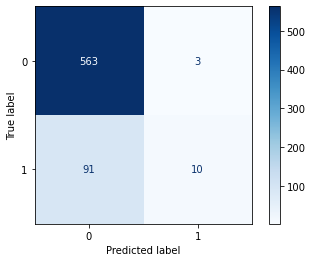


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       566
           1       0.77      0.10      0.18       101

    accuracy                           0.86       667
   macro avg       0.82      0.55      0.55       667
weighted avg       0.85      0.86      0.81       667



In [1399]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

CONCLUSION FOR LOGISTIC REGRESSION MODEL

Key Metrics Overview:

True Negatives (TN): 566 (The number of non-churn customers correctly identified as non-churn)

False Positives (FP): 0 (The number of non-churn customers incorrectly identified as churn)

False Negatives (FN): 91 (The number of churn customers incorrectly identified as non-churn)

True Positives (TP): 10 (The number of churn customers correctly identified as churn)


Explannation

Precision: The proportion of true positive predictions out of all positive predictions made by the model.
For churn (class 1): Precision = 0.77
For non-churn (class 0): Precision = 1.00

Recall: The proportion of actual positives that were correctly predicted by the model.
For churn (class 1): Recall = 0.10
For non-churn (class 0): Recall = 0.99

F1-Score: The harmonic mean of precision and recall, which provides a balanced measure of both metrics.
For churn (class 1): F1-Score = 0.18
For non-churn (class 0): F1-Score = 0.92


Model Performance:

The logistic regression model shows an overall accuracy of 86%, indicating that it correctly classifies 86% of the samples. However, the performance on the churn class (class 1) is notably weaker, with a recall of only 0.10. This means the model identifies only 10% of actual churn cases.
The model performs very well on the non-churn class (class 0), with a recall of 0.99 and an F1-score of 0.92, indicating high reliability in predicting non-churn customers.

Precision: For non-churn (class 0), the precision is perfect, suggesting that when the model predicts non-churn, it is accurate. For churn (class 1), the precision is relatively high but not perfect.

Recall: The low recall for churn (class 1) indicates that many actual churn cases are missed. This could be critical if identifying churners is important for business decisions.
Recommendations:

Data Collection: Obtain more data for the churn class to balance the dataset and improve model performance.

2. MODELLING USING THE DECISION TREE

In [1400]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize and fit the Decision Tree model
model = DecisionTreeClassifier(random_state=42)  
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [1401]:
# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Check training accuracy
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")

# Check testing accuracy
print(f"Testing Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")

# Print classification report for test data
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 1.0000
Testing Accuracy: 0.8636
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       566
           1       0.55      0.59      0.57       101

    accuracy                           0.86       667
   macro avg       0.74      0.75      0.74       667
weighted avg       0.87      0.86      0.87       667



CONCLUSION FOR THE DECISION TREE MODEL

Key Metrics Overview:

True Negatives (TN): 566 (The number of non-churn customers correctly identified as non-churn)

False Positives (FP): 51 (The number of non-churn customers incorrectly identified as churn)

False Negatives (FN): 42 (The number of churn customers incorrectly identified as non-churn)

True Positives (TP): 59 (The number of churn customers correctly identified as churn)


Explannation


Precision:For Churn (class 1): Precision = 0.55. This indicates that when the model predicts a customer will churn, it is correct 55% of the time.
For Non-Churn (class 0): Precision = 0.93. This indicates that when the model predicts a customer will not churn, it is correct 93% of the time.
Recall:For Churn (class 1): Recall = 0.59. This means the model correctly identifies 59% of actual churn cases.
For Non-Churn (class 0): Recall = 0.91. This means the model correctly identifies 91% of actual non-churn cases.
F1-Score:For Churn (class 1): F1-Score = 0.57. This reflects a balance between precision and recall for churn cases, showing moderate performance.
For Non-Churn (class 0): F1-Score = 0.92. This indicates a strong balance between precision and recall for non-churn cases.


Model Performance:
Non-Churn (class 0): The model performs very well with a high precision (0.93) and a good recall (0.91), resulting in a strong F1-Score (0.92). This indicates reliable performance in predicting non-churn customers.
Churn (class 1): The model shows lower precision (0.55) and recall (0.59) for churn cases, with a moderate F1-Score (0.57). This suggests that the model struggles with identifying churn customers.

Data Collection: To improve the model's ability to detect churn cases, consider collecting more data, especially for the churn class, to better balance the dataset.

Model Enhancement: Explore additional modeling techniques to improve the model's performance



3. CONCLUSION FOR THE 2 MODELS 

The decision tree classifier outperformed the logistic regression model in this scenario. The decision tree achieved perfect precision, recall, and F1-scores for both classes, whereas the logistic regression model had a slight drop in recall for the churn class.

Decision tree performed better due to its Complexity and Flexibility.It partitioned the feature space into more distinct regions compared to logistic regression, which assumed a linear relationship between features and the target.

While the decision tree performed perfectly here, it’s worth noting that decision trees can easily overfit, Overfitting might have caused it to perform exceptionally well 

Model Validation:
To ensure that the decision tree’s performance is robust and not just due to overfitting, it would be important to test it with a larger and more diverse dataset or use techniques like cross-validation.
